# 44688-Data Analytics Capstone Project

## FDIP (Fire Department Incident Prediction)

##### 03/13/23 - 04/28/23

##### Debra D. "DeeDee" Walker

##### Northwest Missouri State University, Maryville MO 64468, USA

In [6]:
#Import the pandas framework to import and work with the dataset
import pandas as pd

#Import numpy
import numpy as np

#Import datetime so we can work with dates and times
import datetime as dt

#graphic imports
import matplotlib.pyplot as plt
%matplotlib inline

#import metrics and stats we may use
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

#Original data was accessed through the csv file download due to the limitations of the API on the site for this large dataset. The API endpoint limits hits and requires data to be requested by page
# Data was pulled from https://data.cityofnewyork.us/Public-Safety/Incidents-Responded-to-by-Fire-Companies/tm6d-hbzd on March 16, 2023 then cleaned for use.
#Use the function read_csv from pandas and create a dataframe assigned to variable df
df = pd.read_csv('fdip_clean.csv', sep=',')

#convert INCIDENT_DATE_TIME from object to datetime format
df['INCIDENT_DATE_TIME'] = pd.to_datetime(df['INCIDENT_DATE_TIME'], infer_datetime_format = True)

df.head(n=5)

,IM_INCIDENT_KEY,INCIDENT_DATE_TIME,UNITS_ONSCENE,TOTAL_INCIDENT_DURATION,ZIP_CODE,BOROUGH_DESC,INCIDENT_CATEGORY,INCIDENT_CATNUM,LEVEL_CATEGORY,BOROUGH_NUM,Day_of_week,Hour_of_day,MONTH,DAY_NUM,INCIDENT_LENGTH,UNITS_CATEGORY
0,63583742,2018-07-21 12:18:19,1,0.66,10475,2 - Bronx,RESCUE & EMS,3,1,2,Saturday,12,7,6,30min-45min,1
1,63583743,2018-07-21 12:18:26,1,0.12,11230,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,12,7,6,<=15min,1
2,63584267,2018-07-21 14:16:40,2,0.02,11204,4 - Brooklyn,HAZARDOUS CONDITION-NO FIRE,4,1,4,Saturday,14,7,6,<=15min,2
3,63584484,2018-07-21 15:07:51,1,0.37,11235,4 - Brooklyn,SERVICE CALL,5,1,4,Saturday,15,7,6,15min-30min,1
4,63584485,2018-07-21 15:08:36,1,0.32,11208,4 - Brooklyn,RESCUE & EMS,3,1,4,Saturday,15,7,6,15min-30min,1


##### Level Catergory is being dropped from the predictions because it is too skewed to the level of one to gain valid information and we can gain enough
#####  information from incident category, incident length, and units catergory

#### Import sklearn classifiers, etc. for models

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#### Split Data and extract features with single y, incident category

In [3]:
from sklearn.model_selection import train_test_split

Xfeatures = df[['ZIP_CODE','Hour_of_day']]
ylabel = df[['INCIDENT_CATEGORY']]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeatures, ylabel, train_size=0.8, random_state=50)

##### Neural Network (MLP Classifier) with one target

In [4]:
mlp_model = MLPClassifier(random_state=50, activation='tanh', solver='adam', alpha=.05, early_stopping=True)
mlp_model.fit(Xtrain,ytrain.values.ravel())
y_pred = mlp_model.predict(Xtrain)
print("Predicted y:", y_pred)
print()
print("Predicted probabilities:", mlp_model.predict_proba(Xtrain))
print()
print("The mean accuracy on the given test data and labels:", mlp_model.score(Xtrain,ytrain))

Predicted y: ['RESCUE & EMS' 'RESCUE & EMS' 'RESCUE & EMS' ... 'RESCUE & EMS'
 'RESCUE & EMS' 'RESCUE & EMS']

Predicted probabilities: [[7.45146411e-02 1.45231607e-01 6.30594594e-02 ... 5.43409614e-01
  9.64828682e-02 1.54301183e-04]
 [7.45146418e-02 1.45231608e-01 6.30594599e-02 ... 5.43409612e-01
  9.64828686e-02 1.54301182e-04]
 [7.45146419e-02 1.45231608e-01 6.30594600e-02 ... 5.43409612e-01
  9.64828687e-02 1.54301182e-04]
 ...
 [7.45146419e-02 1.45231608e-01 6.30594600e-02 ... 5.43409612e-01
  9.64828687e-02 1.54301182e-04]
 [7.45146418e-02 1.45231608e-01 6.30594599e-02 ... 5.43409612e-01
  9.64828686e-02 1.54301182e-04]
 [7.45146418e-02 1.45231608e-01 6.30594599e-02 ... 5.43409612e-01
  9.64828686e-02 1.54301182e-04]]

The mean accuracy on the given test data and labels: 0.49412897612655027


Confusion Matrix


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is  [0.         0.         0.         0.         0.         0.49412898
 0.         0.        ]


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as macro is  0.061766122015818783


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as weighted is  0.24416344504787288
Recall is  [0. 0. 0. 0. 0. 1. 0. 0.]
Recall as macro is  0.125
Recall as weighted is  0.49412897612655027
F1 is  [0.         0.         0.         0.         0.         0.66142747
 0.         0.        ]
F1 as macro is  0.08267843406122029
F1 as weighted is  0.32683047976333823


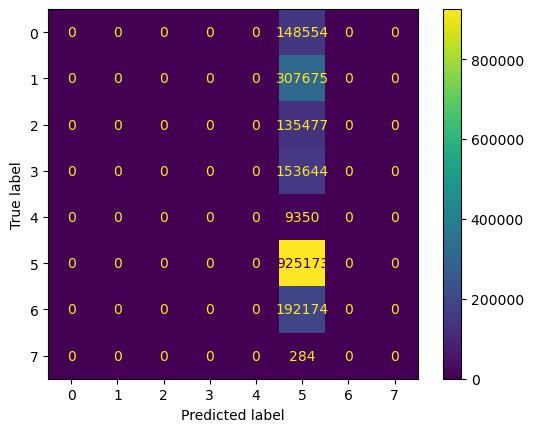

In [8]:
print("Confusion Matrix")
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot()
print('Precision is ', precision_score(ytrain, y_pred, average=None))
print('Precision as macro is ', precision_score(ytrain, y_pred, average='macro'))
print('Precision as weighted is ', precision_score(ytrain, y_pred, average='weighted'))
print('Recall is ', recall_score(ytrain, y_pred, average=None))
print('Recall as macro is ', recall_score(ytrain, y_pred, average='macro'))
print('Recall as weighted is ', recall_score(ytrain, y_pred, average='weighted'))
print('F1 is ', f1_score(ytrain, y_pred, average=None))
print('F1 as macro is ', f1_score(ytrain, y_pred, average='macro'))
print('F1 as weighted is ', f1_score(ytrain, y_pred, average='weighted'))

In [10]:
print(classification_report(ytrain, y_pred))

C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                   precision    recall  f1-score   support

                            CANCELED, GOOD INTENT       0.00      0.00      0.00    148554
                           FALSE ALARM FALSE CALL       0.00      0.00      0.00    307675
                                             FIRE       0.00      0.00      0.00    135477
                      HAZARDOUS CONDITION-NO FIRE       0.00      0.00      0.00    153644
OVERPRESSURE RUPTURE, EXPLOSION, OVERHEAT-NO FIRE       0.00      0.00      0.00      9350
                                     RESCUE & EMS       0.49      1.00      0.66    925173
                                     SERVICE CALL       0.00      0.00      0.00    192174
                SEVERE WEATHER & NATURAL DISASTER       0.00      0.00      0.00       284

                                         accuracy                           0.49   1872331
                                        macro avg       0.06      0.12      0.08   18723

C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### MLP for y label 2

In [11]:
ylabel = df[['UNITS_CATEGORY']]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeatures, ylabel, train_size=0.8, random_state=50)
mlp_model = MLPClassifier(random_state=50, activation='tanh', solver='adam', alpha=.05, early_stopping=True)
mlp_model.fit(Xtrain,ytrain.values.ravel())
y_pred = mlp_model.predict(Xtrain)
print("Predicted y:", y_pred)
print()
print("Predicted probabilities:", mlp_model.predict_proba(Xtrain))
print()
print("The mean accuracy on the given test data and labels:", mlp_model.score(Xtrain,ytrain))

Predicted y: ['1' '1' '1' ... '1' '1' '1']

Predicted probabilities: [[0.67666482 0.11443772 0.07592964 ... 0.04042655 0.0380518  0.00832155]
 [0.67666481 0.11443772 0.07592964 ... 0.04042655 0.0380518  0.00832155]
 [0.67666481 0.11443772 0.07592964 ... 0.04042655 0.0380518  0.00832155]
 ...
 [0.67666481 0.11443772 0.07592964 ... 0.04042655 0.0380518  0.00832155]
 [0.67666481 0.11443772 0.07592964 ... 0.04042655 0.0380518  0.00832155]
 [0.67666481 0.11443772 0.07592964 ... 0.04042655 0.0380518  0.00832155]]

The mean accuracy on the given test data and labels: 0.6163968870888747


Confusion Matrix


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is  [0.61639689 0.         0.         0.         0.         0.
 0.        ]


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as macro is  0.08805669815555353


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as weighted is  0.379945122412855
Recall is  [1. 0. 0. 0. 0. 0. 0.]
Recall as macro is  0.14285714285714285
Recall as weighted is  0.6163968870888747
F1 is  [0.76268012 0.         0.         0.         0.         0.
 0.        ]
F1 as macro is  0.10895430306617745
F1 as weighted is  0.4701136527145074


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.62      1.00      0.76   1154099
           2       0.00      0.00      0.00    303752
           3       0.00      0.00      0.00    156150
           4       0.00      0.00      0.00     78399
           5       0.00      0.00      0.00     81386
           6       0.00      0.00      0.00     82876
   7 or more       0.00      0.00      0.00     15669

    accuracy                           0.62   1872331
   macro avg       0.09      0.14      0.11   1872331
weighted avg       0.38      0.62      0.47   1872331



C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


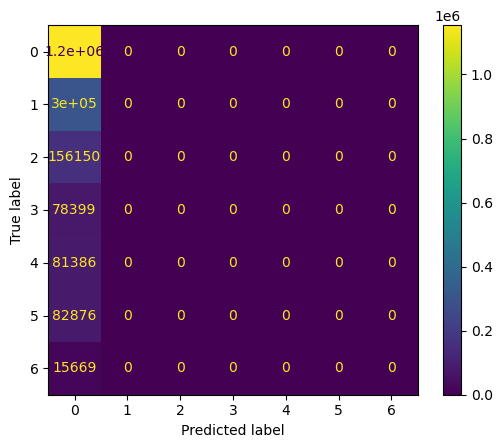

In [12]:
print("Confusion Matrix")
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot()
print('Precision is ', precision_score(ytrain, y_pred, average=None))
print('Precision as macro is ', precision_score(ytrain, y_pred, average='macro'))
print('Precision as weighted is ', precision_score(ytrain, y_pred, average='weighted'))
print('Recall is ', recall_score(ytrain, y_pred, average=None))
print('Recall as macro is ', recall_score(ytrain, y_pred, average='macro'))
print('Recall as weighted is ', recall_score(ytrain, y_pred, average='weighted'))
print('F1 is ', f1_score(ytrain, y_pred, average=None))
print('F1 as macro is ', f1_score(ytrain, y_pred, average='macro'))
print('F1 as weighted is ', f1_score(ytrain, y_pred, average='weighted'))
print(classification_report(ytrain, y_pred))

#### MLP for y label 3

In [13]:
ylabel = df[['INCIDENT_LENGTH']]
Xtrain, Xtest, ytrain, ytest = train_test_split(Xfeatures, ylabel, train_size=0.8, random_state=50)
mlp_model = MLPClassifier(random_state=50, activation='tanh', solver='adam', alpha=.05, early_stopping=True)
mlp_model.fit(Xtrain,ytrain.values.ravel())
y_pred = mlp_model.predict(Xtrain)
print("Predicted y:", y_pred)
print()
print("Predicted probabilities:", mlp_model.predict_proba(Xtrain))
print()
print("The mean accuracy on the given test data and labels:", mlp_model.score(Xtrain,ytrain))

Predicted y: ['15min-30min' '15min-30min' '15min-30min' ... '15min-30min' '15min-30min'
 '15min-30min']

Predicted probabilities: [[0.04313826 0.39849948 0.00397087 ... 0.00190084 0.0548638  0.39505394]
 [0.04313826 0.39849948 0.00397087 ... 0.00190084 0.0548638  0.39505394]
 [0.04313826 0.39849948 0.00397087 ... 0.00190084 0.0548638  0.39505394]
 ...
 [0.04313826 0.39849948 0.00397087 ... 0.00190084 0.0548638  0.39505394]
 [0.04313826 0.39849948 0.00397087 ... 0.00190084 0.0548638  0.39505394]
 [0.04313826 0.39849948 0.00397087 ... 0.00190084 0.0548638  0.39505394]]

The mean accuracy on the given test data and labels: 0.4114064233300629


Confusion Matrix


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is  [0.         0.41140642 0.         0.         0.         0.
 0.        ]


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as macro is  0.058772346190008984


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision as weighted is  0.16925524515723492
Recall is  [0. 1. 0. 0. 0. 0. 0.]
Recall as macro is  0.14285714285714285
Recall as weighted is  0.4114064233300629
F1 is  [0.         0.58297372 0.         0.         0.         0.
 0.        ]
F1 as macro is  0.0832819593541907
F1 as weighted is  0.23983913118079087


C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       1-2hr       0.00      0.00      0.00     84421
 15min-30min       0.41      1.00      0.58    770289
       2-3hr       0.00      0.00      0.00      7452
 30min-45min       0.00      0.00      0.00    181653
        3hr>       0.00      0.00      0.00      4562
   45min-1hr       0.00      0.00      0.00     92353
     <=15min       0.00      0.00      0.00    731601

    accuracy                           0.41   1872331
   macro avg       0.06      0.14      0.08   1872331
weighted avg       0.17      0.41      0.24   1872331



C:\Users\ddwal\anaconda3\envs\py311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


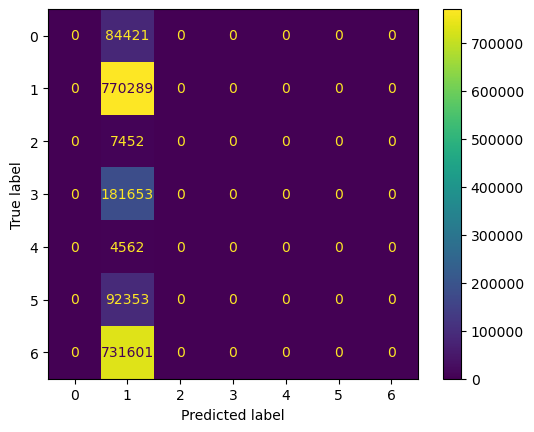

In [14]:
print("Confusion Matrix")
cm = confusion_matrix(ytrain, y_pred)
ConfusionMatrixDisplay(cm).plot()
print('Precision is ', precision_score(ytrain, y_pred, average=None))
print('Precision as macro is ', precision_score(ytrain, y_pred, average='macro'))
print('Precision as weighted is ', precision_score(ytrain, y_pred, average='weighted'))
print('Recall is ', recall_score(ytrain, y_pred, average=None))
print('Recall as macro is ', recall_score(ytrain, y_pred, average='macro'))
print('Recall as weighted is ', recall_score(ytrain, y_pred, average='weighted'))
print('F1 is ', f1_score(ytrain, y_pred, average=None))
print('F1 as macro is ', f1_score(ytrain, y_pred, average='macro'))
print('F1 as weighted is ', f1_score(ytrain, y_pred, average='weighted'))
print(classification_report(ytrain, y_pred))

In [ ]:
#### Hyperparameter Tuning for Neural Network (MLP Classifier)
'Ran for hours without completing'

grid_search = GridSearchCV(
    mlp_model,
    param_grid = {'hidden_layer_sizes': [(10,30,10),(20,)],
               'activation': ['tanh', 'relu'],
               'solver': ['sgd', 'adam'],'alpha': [0.0001, 0.05],'learning_rate': ['constant','adaptive']},
    cv=5, n_jobs=-1)

grid_search.fit(Xtrain, ytrain.values.ravel())

grid_search.best_params_

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

cv_res = pd.DataFrame(grid_search.cv_results_)

cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()